## MNIST handwritten digits prediction

<img src="https://miro.medium.com/max/800/1*LyRlX__08q40UJohhJG9Ow.png" align="left" width="600">

### Import Python libraries

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

### Prepare the data

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# The data, split between train and test sets
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print("X_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### Show single handwritten digits

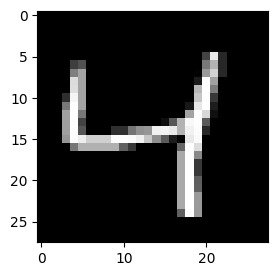

In [3]:
import matplotlib.pyplot as plt

image  = X_train[2] # Change index in [] to show other digits
fig    = plt.figure(figsize=(3,3))
plt.imshow(image, cmap='gray')
plt.show()

In [4]:
X_train[2].shape

(28, 28, 1)

### Initialize the model

In [5]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
# model.summary()

### Train the model

In [6]:
batch_size = 128
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.7685 - loss: 0.7670 - val_accuracy: 0.9777 - val_loss: 0.0811
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9626 - loss: 0.1216 - val_accuracy: 0.9837 - val_loss: 0.0602
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9724 - loss: 0.0883 - val_accuracy: 0.9877 - val_loss: 0.0464
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9771 - loss: 0.0731 - val_accuracy: 0.9890 - val_loss: 0.0397
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9791 - loss: 0.0653 - val_accuracy: 0.9898 - val_loss: 0.0363


### Evaluate the trained model

In [12]:
# Calculate the test loss and accuracy
score = model.evaluate(X_test, y_test, verbose=0)
print(f"Test loss: {score[0]:.4f}")
print(f"Test accuracy: {score[1]:.4f}")

Test loss: 0.0350
Test accuracy: 0.9875


### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [8]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
NT
Windows | 10
Datetime: 2024-09-24 15:15:05
Python Version: 3.11.9
-----------------------------------
